## Setup Guide

1. **Install and Use Python 3.10**

2. **Navigate to the Project Directory**
   ```sh
   cd path/to/your/project
   ```


3. **Create a Virtual Environment**
   ```sh
   python3.10 -m venv venv
   ```

4. **Activate the Virtual Environment**
   - On macOS/Linux:
     ```sh
     source venv/bin/activate
     ```
   - On Windows:
     ```sh
     .\venv\Scripts\activate
     ```

5. **Install Required Libraries**
   ```sh
   pip3.10 install -r requirements.txt
   ```

6. **Reactivating the Virtual Environment**
   - On macOS/Linux:
     ```sh
     source venv/bin/activate
     ```
   - On Windows:
     ```sh
     .\venv\Scripts\activate
     ```


# Data Wrangler for VSCode
- Recommended: download [DataWrangler for VSCode](vscode:extension/ms-toolsai.datawrangler)
- How to view a data in Data Wrangler:
  1. "Run all" the notebook cells on the top bar
  2. Click "View Data" on the top bar
   

# Initialisation

In [165]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set seaborn style
sns.set_theme(style="darkgrid")
# Pther themes available:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

# The Cyclists dataset

In [166]:
# Load dataset
cyclists_df = pd.read_csv('./cyclists.csv')

# Display dataset information
cyclists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [167]:
# Display the first few rows of the dataset
cyclists_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [168]:
# Summary statistics
cyclists_df.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


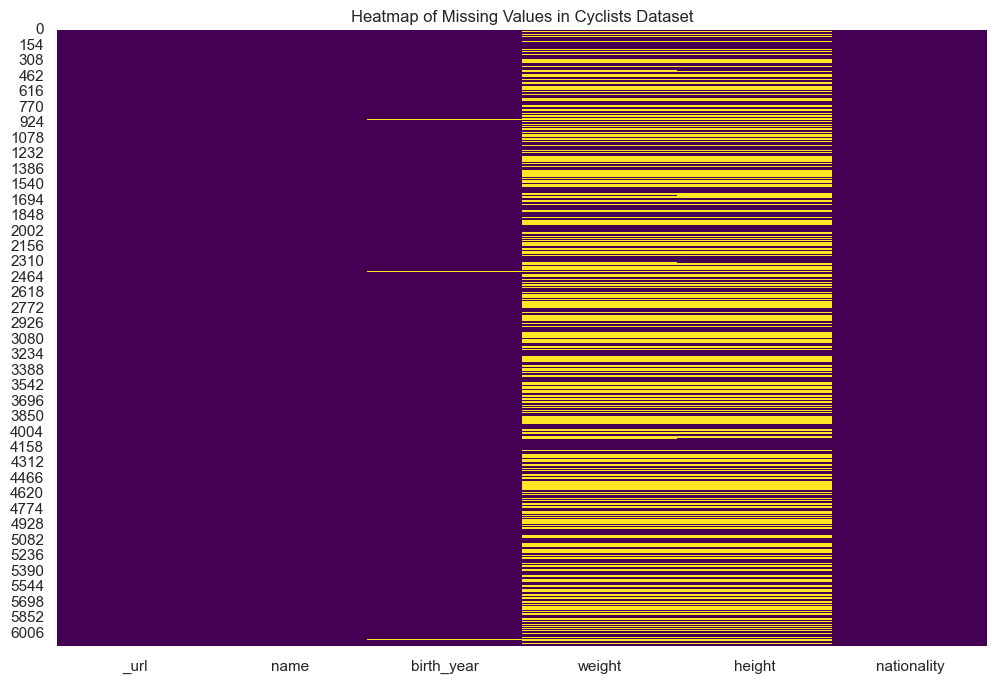

In [169]:
# Check for missing values
cyclists_df.isnull().sum(axis=0)

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cyclists_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Cyclists Dataset')
plt.show()

## Fixing the types


In [170]:
# Cast _url, name, and nationality to string
cyclists_df['_url'] = cyclists_df['_url'].astype('string')
cyclists_df['name'] = cyclists_df['name'].astype('string')
cyclists_df['nationality'] = cyclists_df['nationality'].astype('string')

In [171]:
# TODO: fix types with data casting


# TODO: birth year dovrebbe essere integer?
# Ensure birth_year is an integer
cyclists_df['birth_year'] = cyclists_df['birth_year'].astype('Int64')


Weight: since not many ... then we cast as int 

In [172]:
# Count the number of occurrences of weights that are not .0
non_zero_decimal_weights = cyclists_df['weight'].apply(lambda x: x != int(x) if pd.notnull(x) else False).sum()
print(f"Number of occurrences of weights that are not .0: {non_zero_decimal_weights}")

# Approximate weights to the nearest integer before casting
cyclists_df['weight'] = cyclists_df['weight'].round().astype('Int64')

non_zero_decimal_weights = cyclists_df['weight'].apply(lambda x: x != int(x) if pd.notnull(x) else False).sum()
print(f"Number of occurrences of weights that are not .0: {non_zero_decimal_weights}")

Number of occurrences of weights that are not .0: 15
Number of occurrences of weights that are not .0: 0


we cast to int64, since all the values are .0

In [173]:
# Count the number of occurrences of heights that are not .0
non_zero_decimal_heights = cyclists_df['height'].apply(lambda x: x != int(x) if pd.notnull(x) else False).sum()
print(f"Number of occurrences of heights that are not .0: {non_zero_decimal_heights}")

cyclists_df['height'] = cyclists_df['height'].astype('Int64')

Number of occurrences of heights that are not .0: 0


In [174]:
# Print dataset information for cyclists_df
print("Cyclists Dataset Information:")
cyclists_df.info()


Cyclists Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _url         6134 non-null   string
 1   name         6134 non-null   string
 2   birth_year   6121 non-null   Int64 
 3   weight       3078 non-null   Int64 
 4   height       3143 non-null   Int64 
 5   nationality  6133 non-null   string
dtypes: Int64(3), string(3)
memory usage: 305.6 KB


# Data Semantics

In [175]:
# Check for duplicates in the _url column
duplicate_urls = cyclists_df[cyclists_df['_url'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate URLs:")
print(duplicate_urls)

Duplicate URLs:
Empty DataFrame
Columns: [_url, name, birth_year, weight, height, nationality]
Index: []


In [176]:
# Check for duplicates in the name column
duplicate_names = cyclists_df[cyclists_df['name'].duplicated(keep=False)]

# Display the duplicate entries
print("Duplicate Names:")
print(duplicate_names)

Duplicate Names:
                            _url                name  birth_year  weight  \
347               andrea-peron-1       Andrea  Peron        1971      70   
1745          roman-kreuziger-sr    Roman  Kreuziger        1965    <NA>   
2235           alessandro-pozzi2   Alessandro  Pozzi        1969    <NA>   
2601             roman-kreuziger    Roman  Kreuziger        1986      65   
2682                andrea-peron       Andrea  Peron        1988      70   
2862       antonio-cabello-baena    Antonio  Cabello        1990      67   
2939               jesus-lopez23        Jesús  López        1955    <NA>   
2953     alberto-fernandez-sainz  Alberto  Fernández        1981    <NA>   
3238             antonio-cabello    Antonio  Cabello        1956    <NA>   
4917  sergio-dominguez-rodriguez   Sergio  Domínguez        1979    <NA>   
4919      sergio-dominguez-munoz   Sergio  Domínguez        1986    <NA>   
5040          jesus-lopez-carril        Jesús  López        1949    <NA

The names are the same, but since the birth year and url are different, it is a different person. SO: no duplicates found.

# Analysis of single attributes of the Cyclists dataset

Summary Statistics for Birth Year:
count         6121.0
mean     1974.071884
std        15.535834
min           1933.0
25%           1962.0
50%           1974.0
75%           1987.0
max           2004.0
Name: birth_year, dtype: Float64


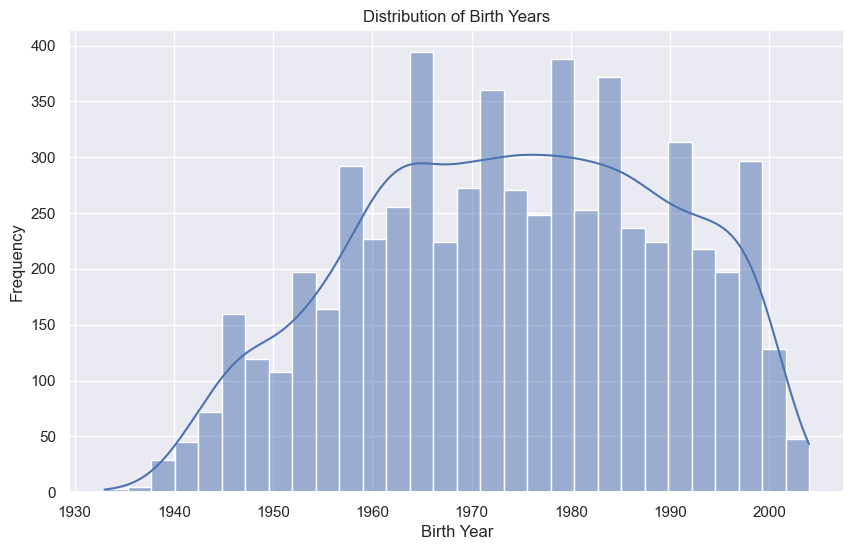

In [177]:
# Summary statistics for birth_year
birth_year_summary = cyclists_df['birth_year'].describe()
print("Summary Statistics for Birth Year:")
print(birth_year_summary)

# Visualize the distribution of birth_year
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

## The `weight` attribute

Summary Statistics for Weight:
count       3078.0
mean     68.658869
std       6.348963
min           48.0
25%           64.0
50%           69.0
75%           73.0
max           94.0
Name: weight, dtype: Float64


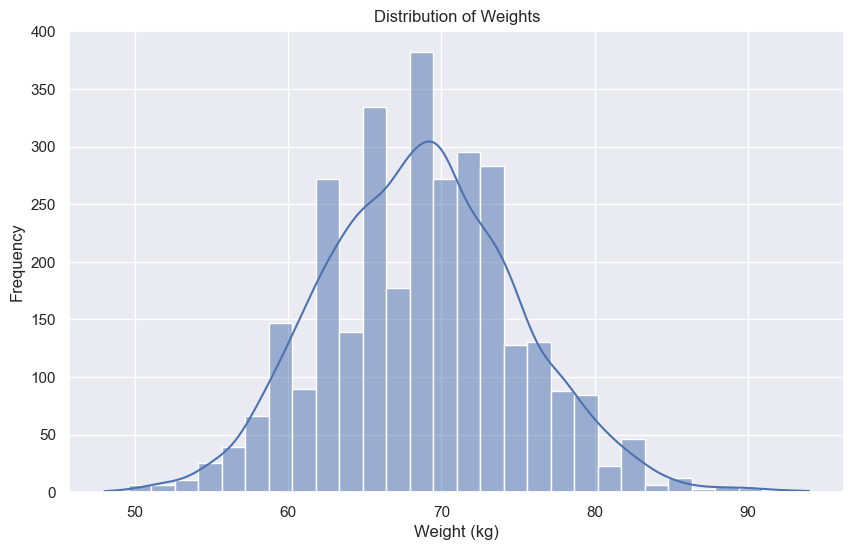

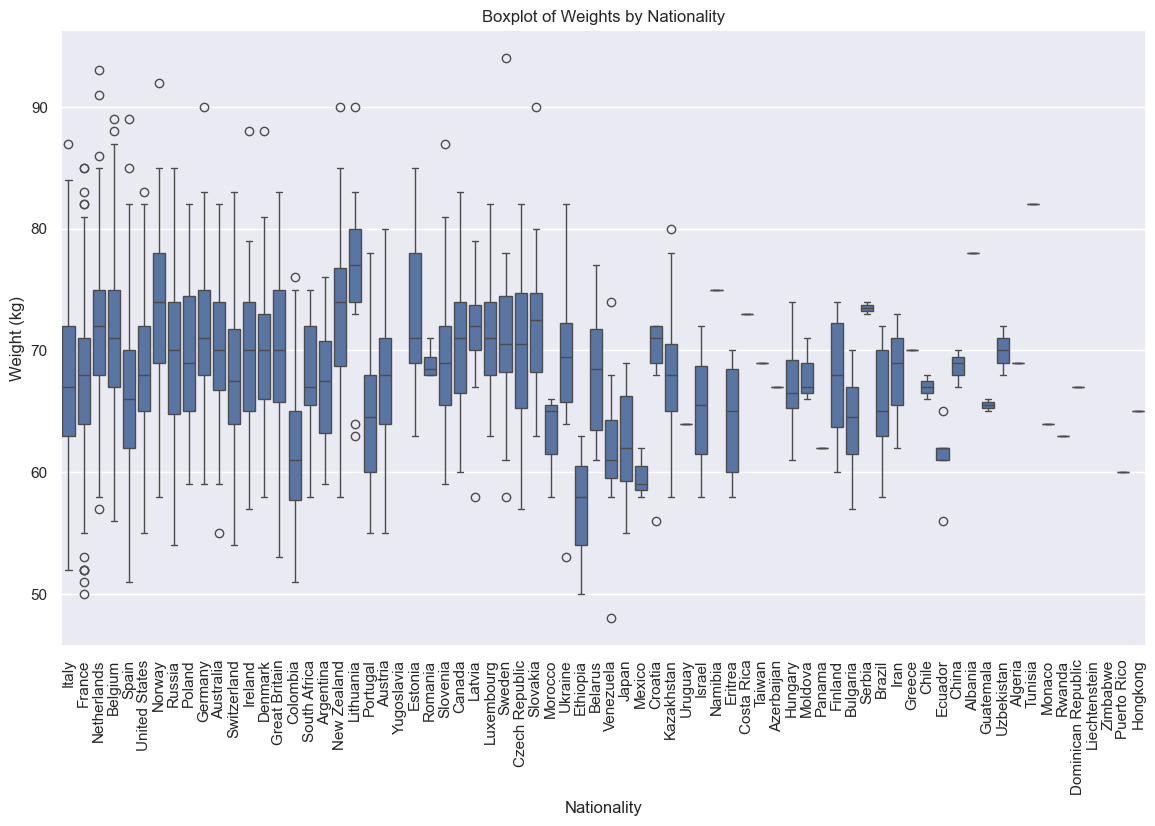

In [178]:
# Summary statistics for weight
weight_summary = cyclists_df['weight'].describe()
print("Summary Statistics for Weight:")
print(weight_summary)

# Visualize the distribution of weight
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()

## The `height` attribute

Summary Statistics for Height:
count        3143.0
mean     179.815145
std        6.443447
min           154.0
25%           175.0
50%           180.0
75%           184.0
max           204.0
Name: height, dtype: Float64


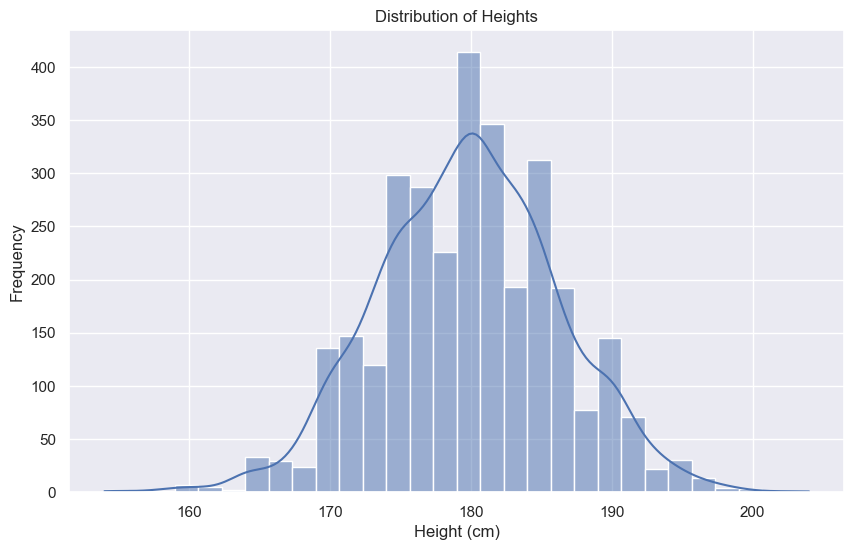

In [179]:
# Summary statistics for height
height_summary = cyclists_df['height'].describe()
print("Summary Statistics for Height:")
print(height_summary)

# Visualize the distribution of height
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

## The `nationality` attribute

Summary Statistics for Nationality:
nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: Int64


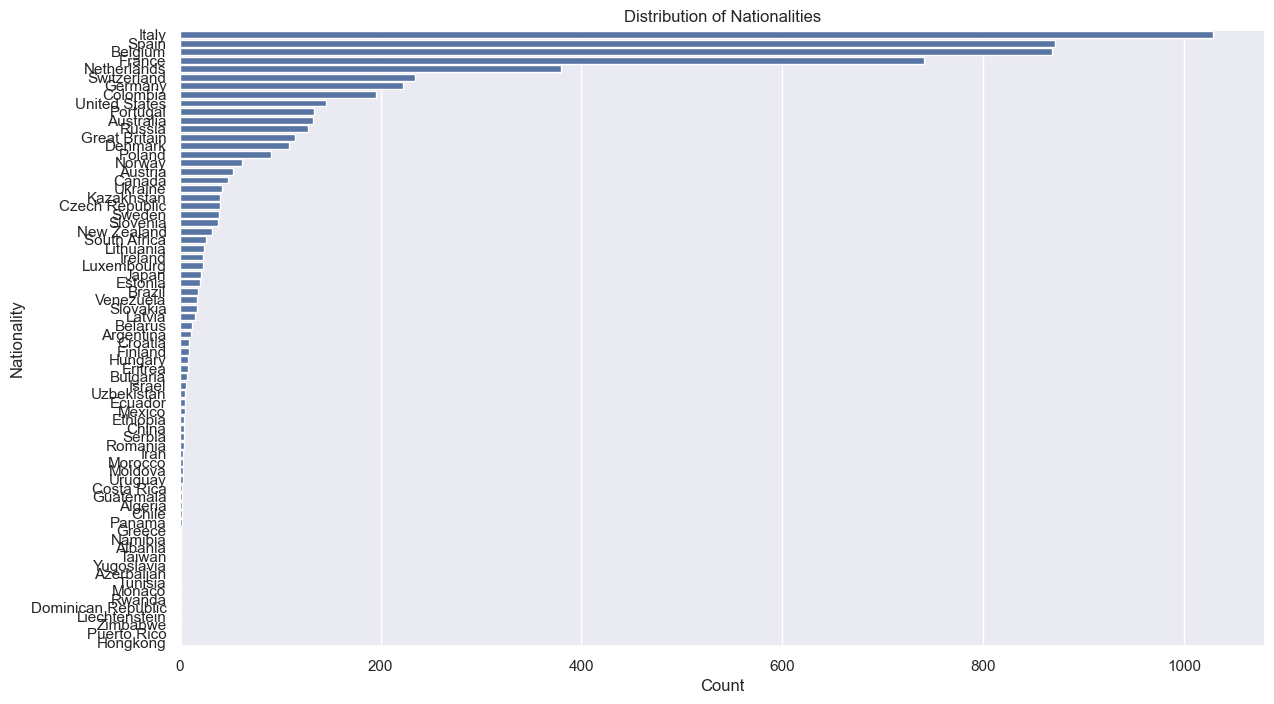

Distinct Nationalities:
<StringArray>
[             'Italy',             'France',        'Netherlands',
            'Belgium',              'Spain',      'United States',
                 <NA>,             'Norway',             'Russia',
             'Poland',            'Germany',          'Australia',
        'Switzerland',            'Ireland',            'Denmark',
      'Great Britain',           'Colombia',       'South Africa',
          'Argentina',        'New Zealand',          'Lithuania',
           'Portugal',            'Austria',         'Yugoslavia',
            'Estonia',            'Romania',           'Slovenia',
             'Canada',             'Latvia',         'Luxembourg',
             'Sweden',     'Czech Republic',           'Slovakia',
            'Morocco',            'Ukraine',           'Ethiopia',
            'Belarus',          'Venezuela',              'Japan',
             'Mexico',            'Croatia',         'Kazakhstan',
            'Uruguay',  

In [180]:
# Summary statistics for nationality
nationality_summary = cyclists_df['nationality'].value_counts()
print("Summary Statistics for Nationality:")
print(nationality_summary)

# Visualize the distribution of nationalities
plt.figure(figsize=(14, 8))
sns.countplot(y='nationality', data=cyclists_df, order=nationality_summary.index)
plt.title('Distribution of Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

# Show distinct nationalities
distinct_nationalities = cyclists_df['nationality'].unique()
print("Distinct Nationalities:")
print(distinct_nationalities)
# TODO: attenzione! c'è 'nan' come nazione, però lo abbiamo risolto più avanti

# Nationalities with low frequency
rare_nationalities = nationality_summary[nationality_summary <= 2]
print("Nationalities with Frequency less or equal than 2:")
print(rare_nationalities)

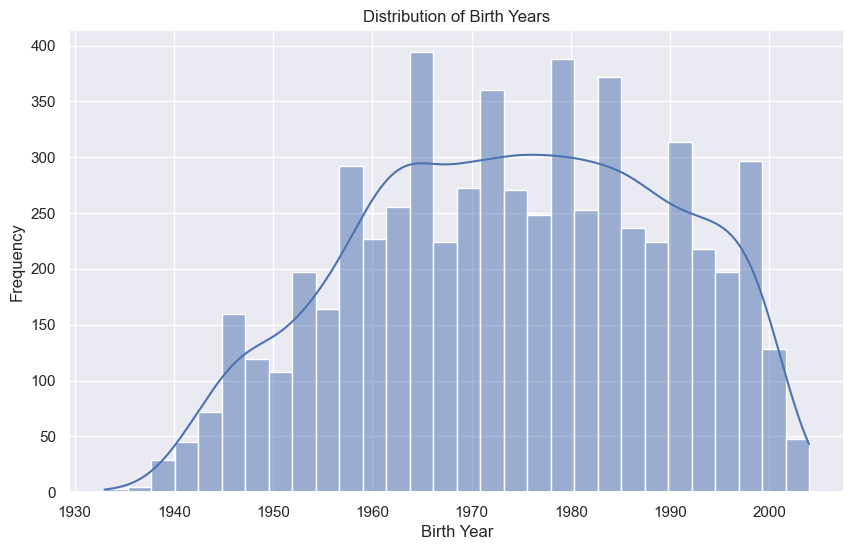

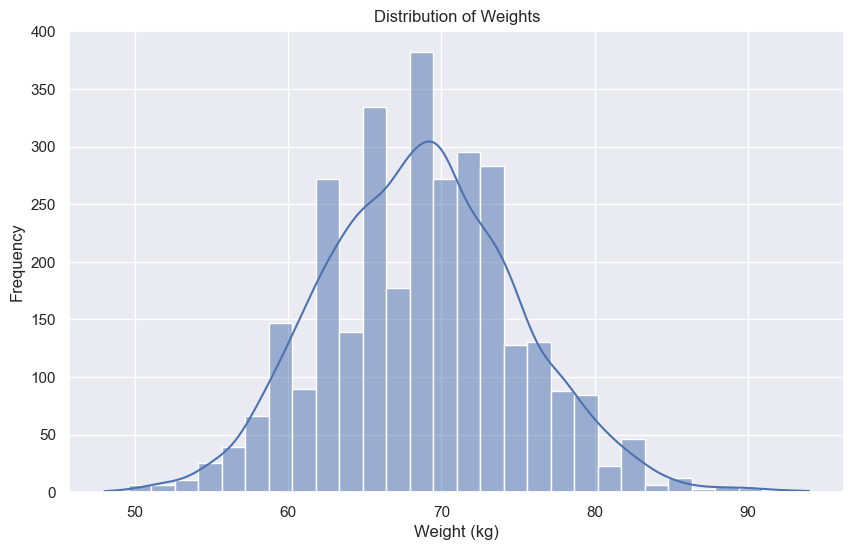

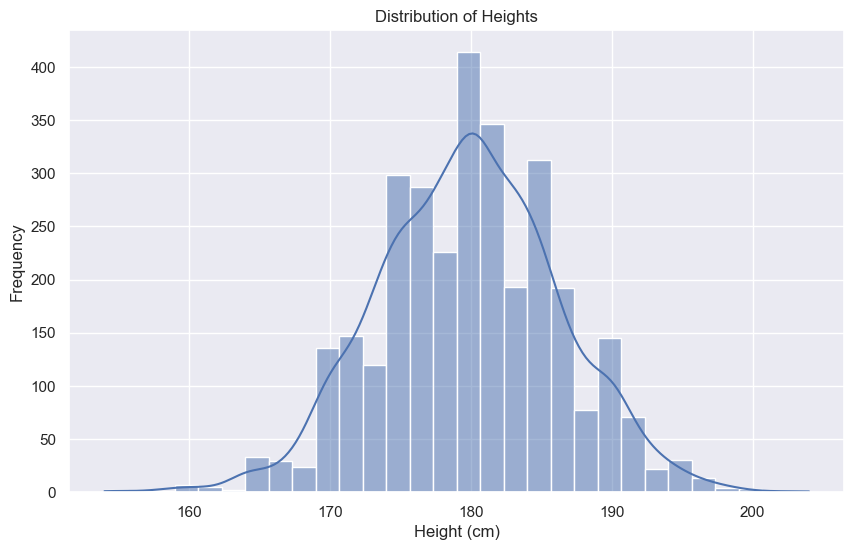

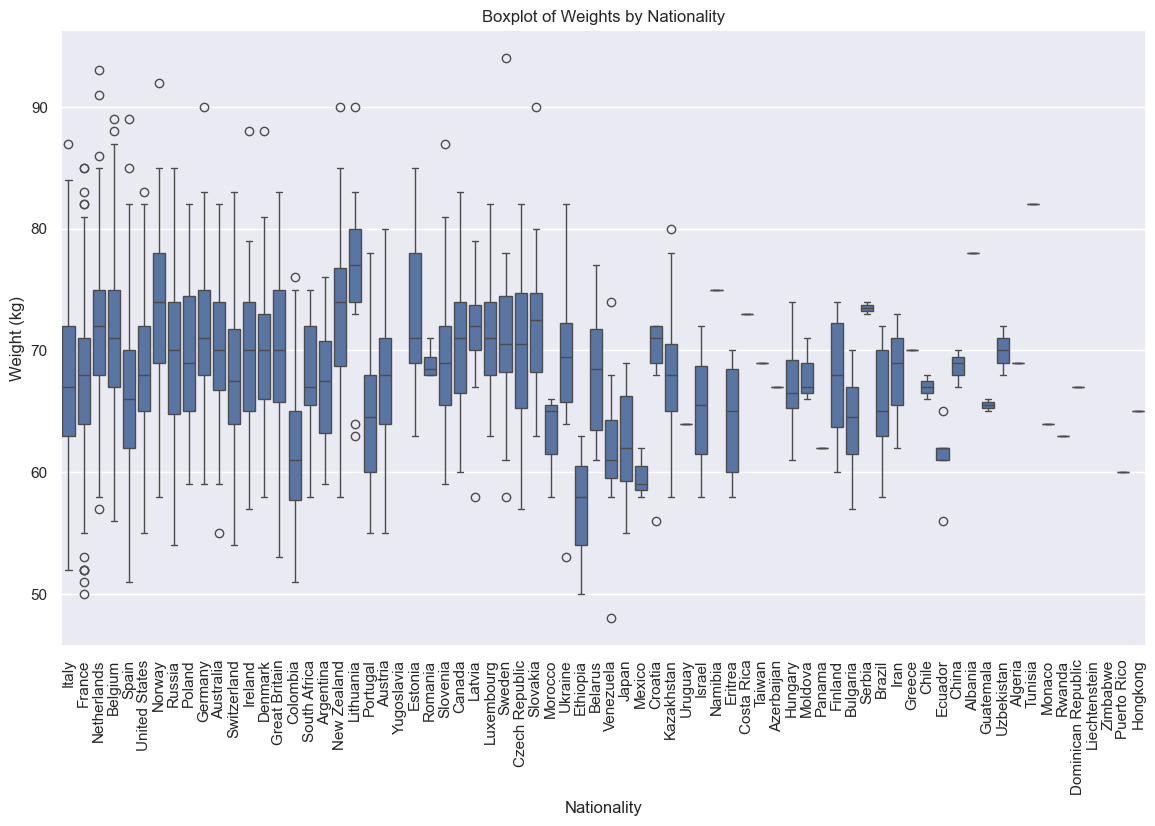

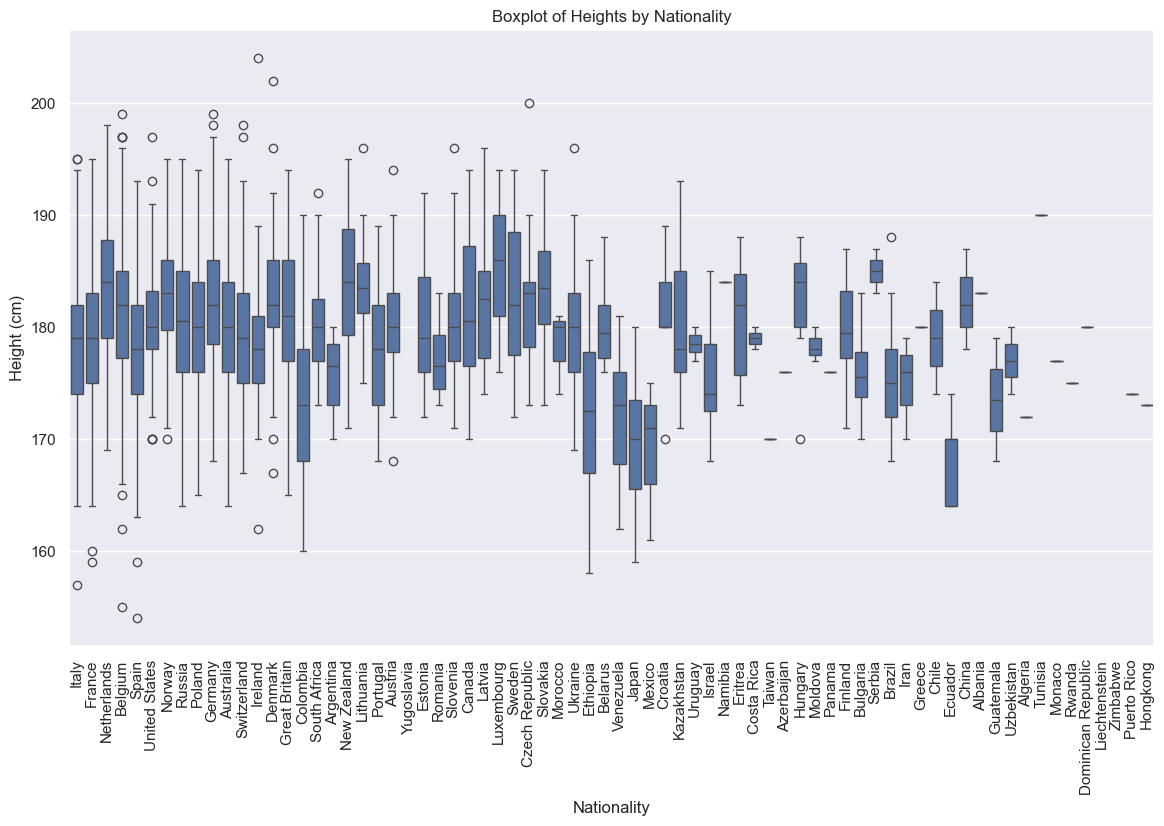

In [181]:
# Distribution of birth years
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['birth_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Distribution of weights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# Distribution of heights
plt.figure(figsize=(10, 6))
sns.histplot(cyclists_df['height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of weights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='weight', data=cyclists_df)
plt.title('Boxplot of Weights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90)
plt.show()

# Boxplot of heights by nationality
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality', y='height', data=cyclists_df)
plt.title('Boxplot of Heights by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Height (cm)')
plt.xticks(rotation=90)
plt.show()

# The Races dataset

In [182]:
# Load the races dataset
races_df = pd.read_csv('./races.csv')
# Display basic information about the dataset
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

In [183]:
# Display the first few rows of the dataset
races_df.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


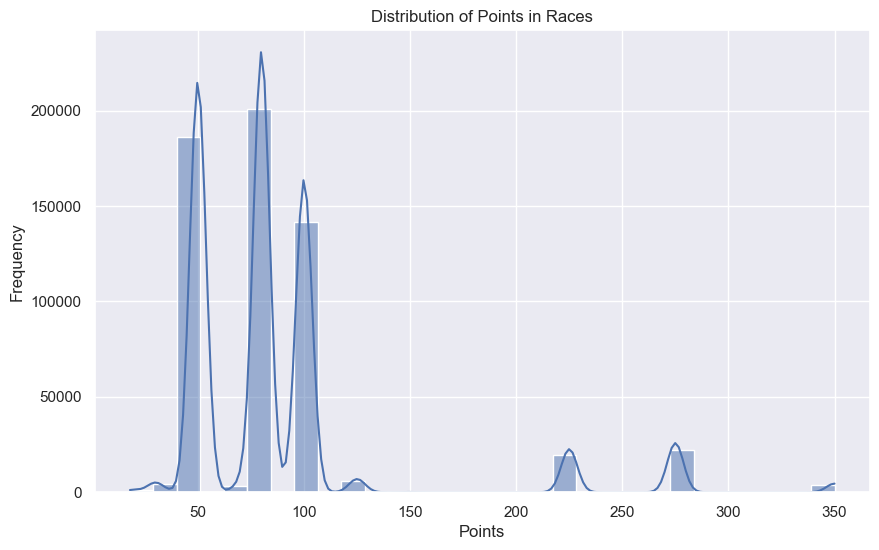

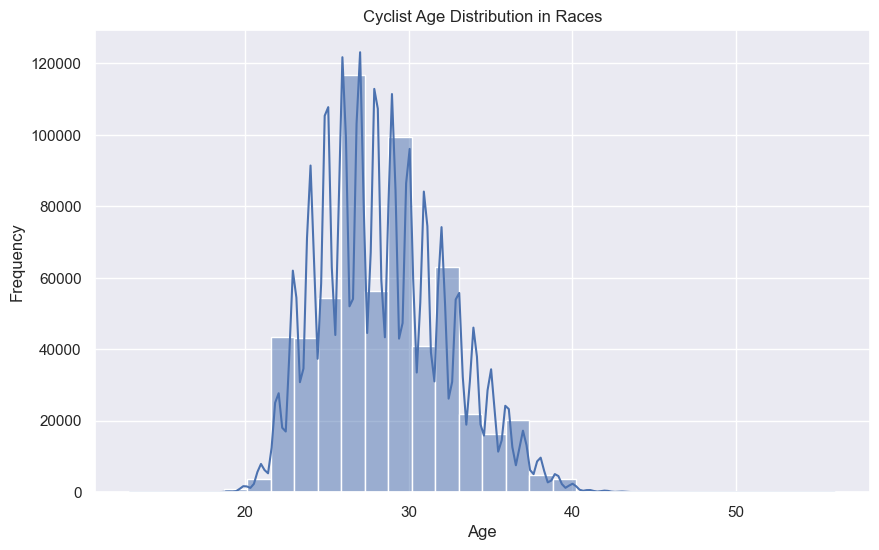

In [184]:
# Distribution of points in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['points'].dropna(), bins=30, kde=True)
plt.title('Distribution of Points in Races')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Cyclist age distribution in races
plt.figure(figsize=(10, 6))
sns.histplot(races_df['cyclist_age'].dropna(), bins=30, kde=True)
plt.title('Cyclist Age Distribution in Races')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Transformation

In [185]:
# TODO: fare una funzione per aggiungere i birth year. aggiungere i valori mancanti da wikipedia manualmente

In [186]:



# fonte = https://www.wikiwand.com/it/articles/Scott_Davies


# Update the cyclist with the specified URL
cyclists_df.loc[cyclists_df['_url'] == 'scott-davies', ['nationality', 'height', 'weight', 'birth_year']] = ['United Kingdom', 184, 66, 1995]

# Verify the update
cyclist_updated = cyclists_df[cyclists_df['_url'] == 'scott-davies']
print(cyclist_updated)

# TODO: controllare se ha funzionato

           _url           name  birth_year  weight  height     nationality
9  scott-davies  Scott  Davies        1995      66     184  United Kingdom
